# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alridho
- **Email:** alridho2003@gmail.com
- **ID Dicoding:** ridho2003

## Menentukan Pertanyaan Bisnis

- Apakah kondisi lingkungan berpengaruh dengan jumlah perental sepeda?
- Bagaimana perbandingan jumlah rental sepeda pada akhir pekan dan hari biasa?
- Seiring perkembangan waktu, tren perental sepeda naik atau turun?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Pertanyaan di atas tidak memerlukan data hour.csv, jadi hanya day.csv yang digunakan

In [3]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

1. Meriksa tipe data day_df

In [4]:
day_df.info(), day_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


(None,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

Terlihat tipe data untuk dteday menggunakan object, di mana seharusnya direpresentasikan dengan datetime. Tidak ada duplikasi data pada 

2. Memeriksa Duplikasi Data

In [5]:
print("Jumlah duplikasi data day_df: ", day_df.duplicated().sum())

Jumlah duplikasi data day_df:  0


3. Memeriksa parameter statistik data

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada anomali pada data

### Cleaning Data

Berikut beberapa cleaning ataupun perbaikan yang akan saya lakukan terhadap data:
- Menghapus casual dan registered karena pertanyaan yang saya ajukan berlaku untuk semua jenis perental.
- Menghapus kolom instant karena tidak memiliki pengaruh terhadap analisis yang akan saya lakukan.
- Menghapus atemp, karena sudah ada normalized temperature
- Menghapus windspeed karena tidak digunakan dalam konteks pertanyaan.
- Menghapus holiday dan weekday karena workingday sudah cukup untuk menentukan weekday ataupun weekend
- Rename data agar mudah dipahami.
- Mengganti tipe data dteday dan data yang sudah direname

#### Hapus kolom data yang tidak diperlukan

In [7]:
removed_columns = ['instant', 'atemp', 'casual', 'registered', 'holiday', 'weekday']
day_df.drop(columns=removed_columns, inplace=True)
day_df.head()

,dteday,season,yr,mnth,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,1,1,0.226957,0.436957,0.186900,1600


#### Rename Data

In [8]:
season_labels = {
    1:"springer", 
    2:"summer", 
    3:"fall", 
    4:"winter"
}
yr_labels = {
    0: 2011,
    1: 2012
}
weather_labels = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow/Fog'
}
month_labels = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

day_df['season'] = day_df['season'].map(season_labels)
day_df['yr'] = day_df['yr'].map(yr_labels)
day_df['weathersit'] = day_df['weathersit'].map(weather_labels)
day_df['mnth'] = day_df['mnth'].map(month_labels)

day_df.head()

,dteday,season,yr,mnth,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,springer,2011,January,0,Mist/Cloudy,0.344167,0.805833,0.160446,985
1,2011-01-02,springer,2011,January,0,Mist/Cloudy,0.363478,0.696087,0.248539,801
2,2011-01-03,springer,2011,January,1,Clear/Few clouds,0.196364,0.437273,0.248309,1349
3,2011-01-04,springer,2011,January,1,Clear/Few clouds,0.200000,0.590435,0.160296,1562
4,2011-01-05,springer,2011,January,1,Clear/Few clouds,0.226957,0.436957,0.186900,1600


#### Ganti Tipe Data

In [10]:
# Ubah tipe data dteday jari datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Ubah tipe data season, yr, weathersit, mnth jadi kategorikal
day_df['season'] = day_df['season'].astype('category')
day_df['yr'] = day_df['yr'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')
day_df['mnth'] = day_df['mnth'].astype('category')

day_df.head(), day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   workingday  731 non-null    category      
 5   weathersit  731 non-null    category      
 6   temp        731 non-null    float64       
 7   hum         731 non-null    float64       
 8   windspeed   731 non-null    float64       
 9   cnt         731 non-null    int64         
dtypes: category(5), datetime64[ns](1), float64(3), int64(1)
memory usage: 33.2 KB


(      dteday    season    yr     mnth workingday        weathersit      temp  \
 0 2011-01-01  springer  2011  January          0       Mist/Cloudy  0.344167   
 1 2011-01-02  springer  2011  January          0       Mist/Cloudy  0.363478   
 2 2011-01-03  springer  2011  January          1  Clear/Few clouds  0.196364   
 3 2011-01-04  springer  2011  January          1  Clear/Few clouds  0.200000   
 4 2011-01-05  springer  2011  January          1  Clear/Few clouds  0.226957   
 
         hum  windspeed   cnt  
 0  0.805833   0.160446   985  
 1  0.696087   0.248539   801  
 2  0.437273   0.248309  1349  
 3  0.590435   0.160296  1562  
 4  0.436957   0.186900  1600  ,
 None)

## Exploratory Data Analysis (EDA)

##### Analisa Data Terhadap Kondisi Lingkungan dan Jumlah Perental

In [11]:
day_df.groupby('weathersit', observed=False)['cnt'].agg(['mean', 'median', 'sum'])

,mean,median,sum
weathersit,,,
Clear/Few clouds,4876.786177,4844.0,2257952
Light Snow/Rain,1803.285714,1817.0,37869
Mist/Cloudy,4035.862348,4040.0,996858


Dari Hasil di atas, semakin buruknya cuaca berbanding lurus dengan perental sepeda. Pengguna sepeda lebih sedikit ketika cuaca buruk

In [14]:
day_df.groupby('season', observed=False)['cnt'].agg(['mean', 'median', 'sum'])

,mean,median,sum
season,,,
fall,5644.303191,5353.5,1061129
springer,2604.132597,2209.0,471348
summer,4992.331522,4941.5,918589
winter,4728.162921,4634.5,841613


Perental sepeda paling banyak di musim gugur, dan paling rendah di musim semi

In [15]:
day_df[['temp', 'hum', 'cnt']].corr()

,temp,hum,cnt
temp,1.000000,0.126963,0.627494
hum,0.126963,1.000000,-0.100659
cnt,0.627494,-0.100659,1.000000


Suhu berkorelasi sedang dengan jumlah rental sepeda yang lebih tinggi, sementara kelembaban berkorelasi lemah dengan jumlah rental yang sedikit lebih sedikit. Secara keseluruhan, suhu memiliki dampak yang lebih kuat terhadap jumlah rental dibandingkan kelembapan.

##### Pivot Jumlah Pengguna Per-Bulan

In [16]:
day_df['month_year'] = day_df['dteday'].dt.strftime('%B %Y')

(day_df.groupby('month_year')['cnt']
                .sum()
                .reset_index()
                .assign(month_year=lambda x: pd.to_datetime(x['month_year'], format='%B %Y'))
                .sort_values('month_year')
                .set_index('month_year'))

,cnt
month_year,
2011-01-01,38189
2011-02-01,48215
2011-03-01,64045
2011-04-01,94870
2011-05-01,135821
2011-06-01,143512
2011-07-01,141341
2011-08-01,136691
2011-09-01,127418


Dari data di atas nampak seiring berjalannya waktu, jumlah perental sepeda semakin banyak

##### Pivot Weekend/Libur dan Weekdays

In [18]:
day_df.groupby('workingday', observed=False)['cnt'].agg(['mean', 'median', 'sum']).rename(index={1: 'Not Holiday/Weekend', 0: 'Holiday/Weekend'})

,mean,median,sum
workingday,,,
Holiday/Weekend,4330.168831,4459.0,1000269
Not Holiday/Weekend,4584.820000,4582.0,2292410


Dari data di atas dapat dilihat perental justru lebih banyak di hari-hari biasa dibandingkan hari libur atau weekend

## Visualization & Explanatory Analysis

### Pertanyaan 1:

1. Plot Cuaca dan Jumlah Perental

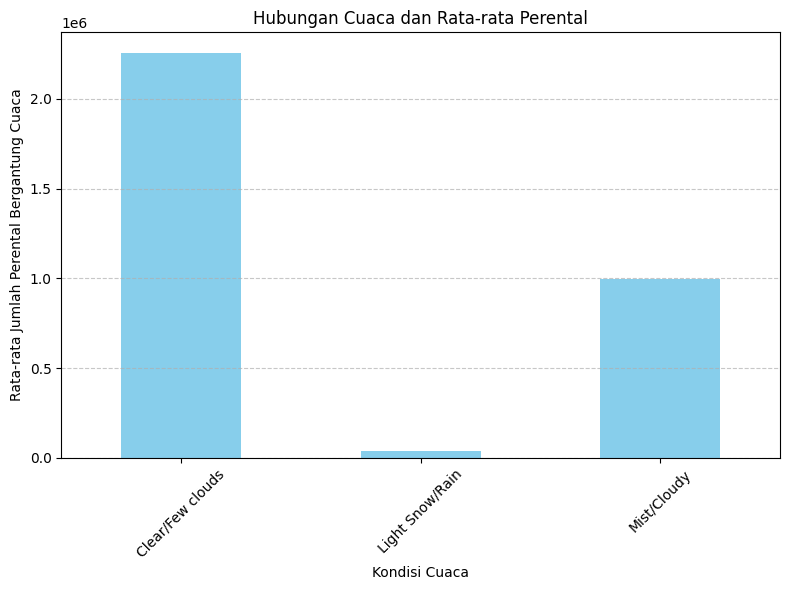

In [20]:
weather_cnt = day_df.groupby('weathersit', observed=True)['cnt'].sum()
plt.figure(figsize=(8, 6))
weather_cnt.plot(kind='bar', color='skyblue')
plt.title('Hubungan Cuaca dan Rata-rata Perental')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Perental Bergantung Cuaca')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dari visualisasi di atas, dapat dilihat bahwa kondisi cuaca memengaruhi jumlah rental. Semakin buruk cuaca, semakin rendah jumlah perental. Hal ini tentu sangat lumrah.

2. Plot Musim dan Jumlah Perental

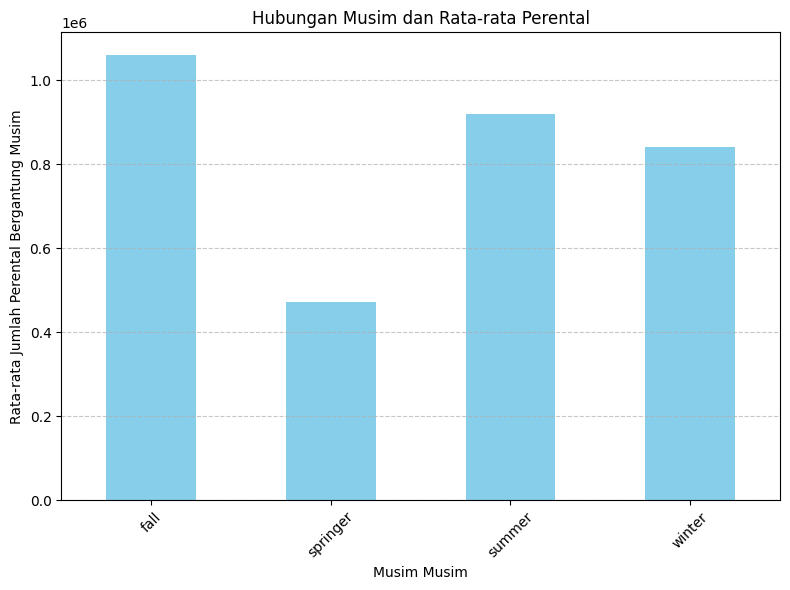

In [21]:
season_cnt = day_df.groupby('season', observed=True)['cnt'].sum()
plt.figure(figsize=(8, 6))
season_cnt.plot(kind='bar', color='skyblue')
plt.title('Hubungan Musim dan Rata-rata Perental')
plt.xlabel('Musim Musim')
plt.ylabel('Rata-rata Jumlah Perental Bergantung Musim')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Saat musim gugur, jumlah perental sangat tinggi sedangkan saat musim semi sebaliknya. Adapun untuk musim panas dan dingin, jumlah perental sedang.

### Pertanyaan 2:

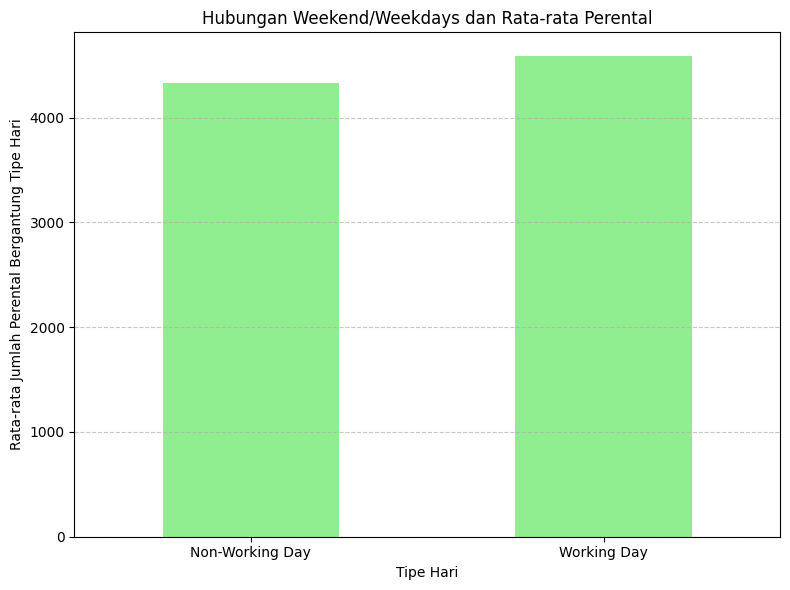

In [23]:
workingday_cnt = day_df.groupby('workingday', observed=True)['cnt'].mean()

day_labels = ['Non-Working Day', 'Working Day']

plt.figure(figsize=(8, 6))
workingday_cnt.plot(kind='bar', color='lightgreen')
plt.title('Hubungan Weekend/Weekdays dan Rata-rata Perental')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Jumlah Perental Bergantung Tipe Hari')
plt.xticks(range(len(day_labels)), day_labels, rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Visualisasi data di atas memperjelas bahwa secara rata-rata, jumlah perental lebih banyak di hari-hari biasa dibandingkan akhir pekan.

### Pertanyaan 3:

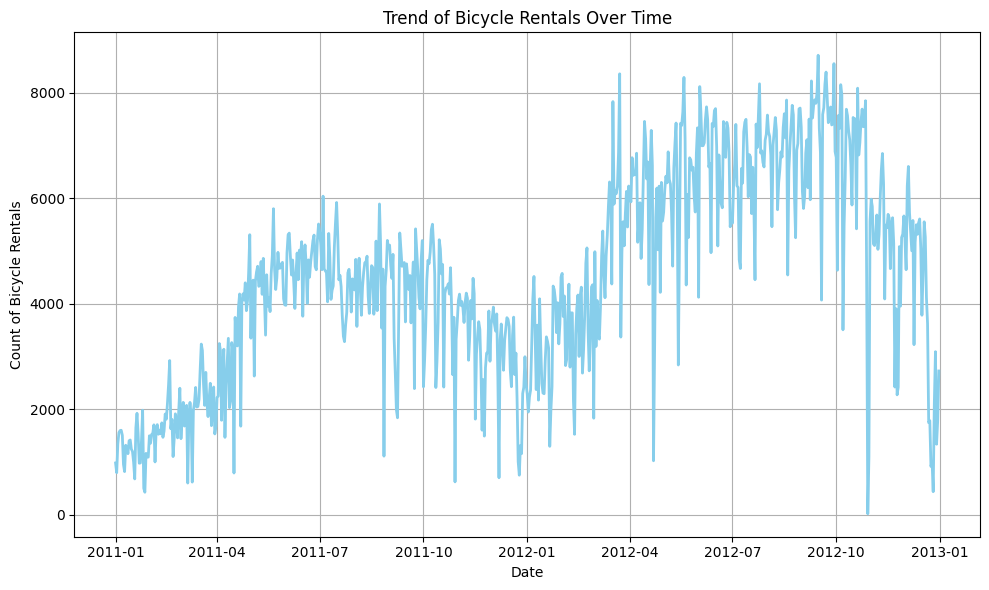

In [25]:
day_df.set_index('dteday', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(day_df.index, day_df['cnt'], color='skyblue', linewidth=2)
plt.title('Trend of Bicycle Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Bicycle Rentals')
plt.grid(True)
plt.tight_layout()
plt.show()

Dari data di atas nampak jumlah rental memiliki tren naik seiring berjalannya waktu. Nampak juga jumlah perental menurun tiap tahun baru

## Conclusion

- Conclution pertanyaan 1: Kondisi lingkungan berpengaruh dengan jumlah rental sepeda. Pengguna tentu lebih suka bersepeda di cuaca yang cerah dan sejuk dibandingkan hujan.
- Conclution pertanyaan 2: Selanjutnya jika dilihat dari data di atas, pengguna lebih banyak di weekdays (Senin - Jumat), dibandingkan weekend (Sabtu & Minggu), namun selisih tidak terlalu jauh. Hal ini kemungkinan disebabkan para pengguna menggunakan sepeda untuk beraktivitas seperti bekerja.
- Conclution pertanyaan 3: Terakhir, data menunjukkan bahwa seiring berjalannya waktu pengguna rental sepeda semakin banyak. Rata-rata pengguna meningkat di tahun 2012 meningkat cukup signifikan dibandingkan 2011. Hal menarik juga terjadi di mana setiap akhir tahun, pengguna sepeda menurun. Hal ini kemungkinan disebabkkan sibuknya orang-orang untuk mempersiapkan tahun baru